## Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set_style('darkgrid') 

## Load Data

In [3]:
transactions_path='../MATERIALS/DATA/processed_data/transaction_data.csv'
compressed_path  ='../MATERIALS/DATA/processed_data/processed_dataset2.csv'

transactions=pd.read_csv(transactions_path)

compressed  =pd.read_csv(compressed_path) 
compressed.drop('ID', inplace=True, axis=1)

## Data Distribution

Useful information [here](https://seaborn.pydata.org/tutorial/axis_grids.html)

In [4]:
rf_variables=['CAT_Seguros', 'net_count', 'CAT_Taxas e Impostos', 'CAT_Empréstimos e Rendas', 'CAT_Ordenado e Subsídios']

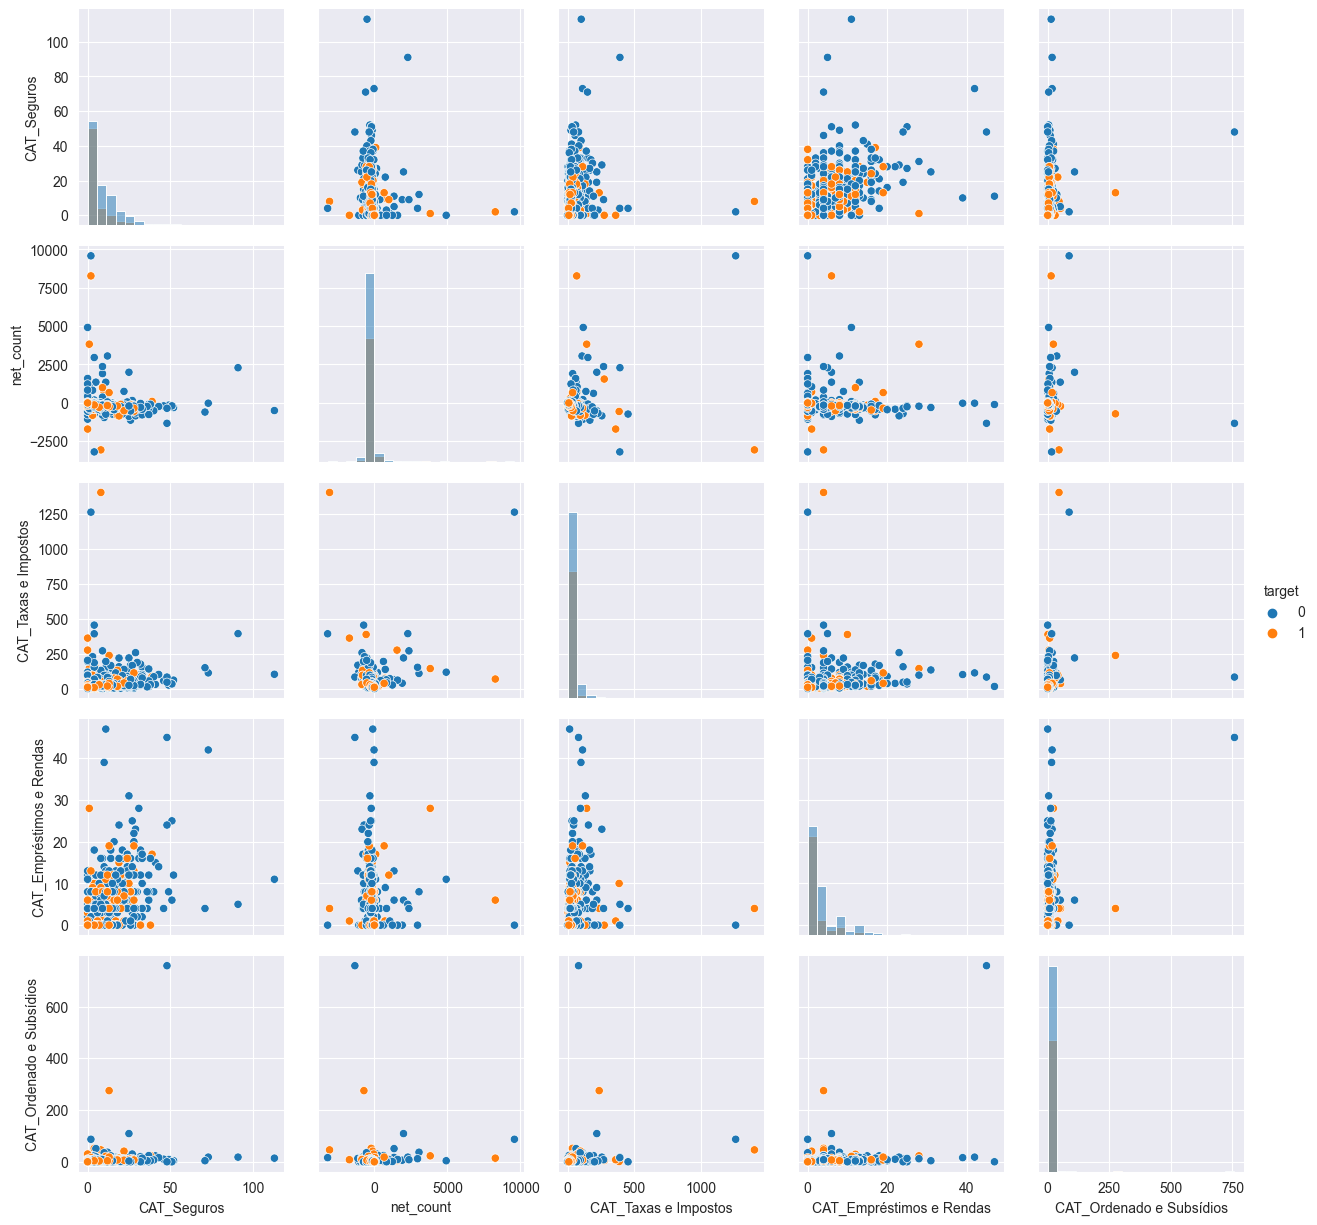

In [5]:
g = sns.PairGrid(compressed, 
                 hue="target",
                 vars=rf_variables)

g.map_diag(sns.histplot, bins=20, alpha=0.5)
g.map_offdiag(sns.scatterplot)
g.add_legend()

plt.show()

Might Be useful to plot histograms of most important variables (According to Random Forest)

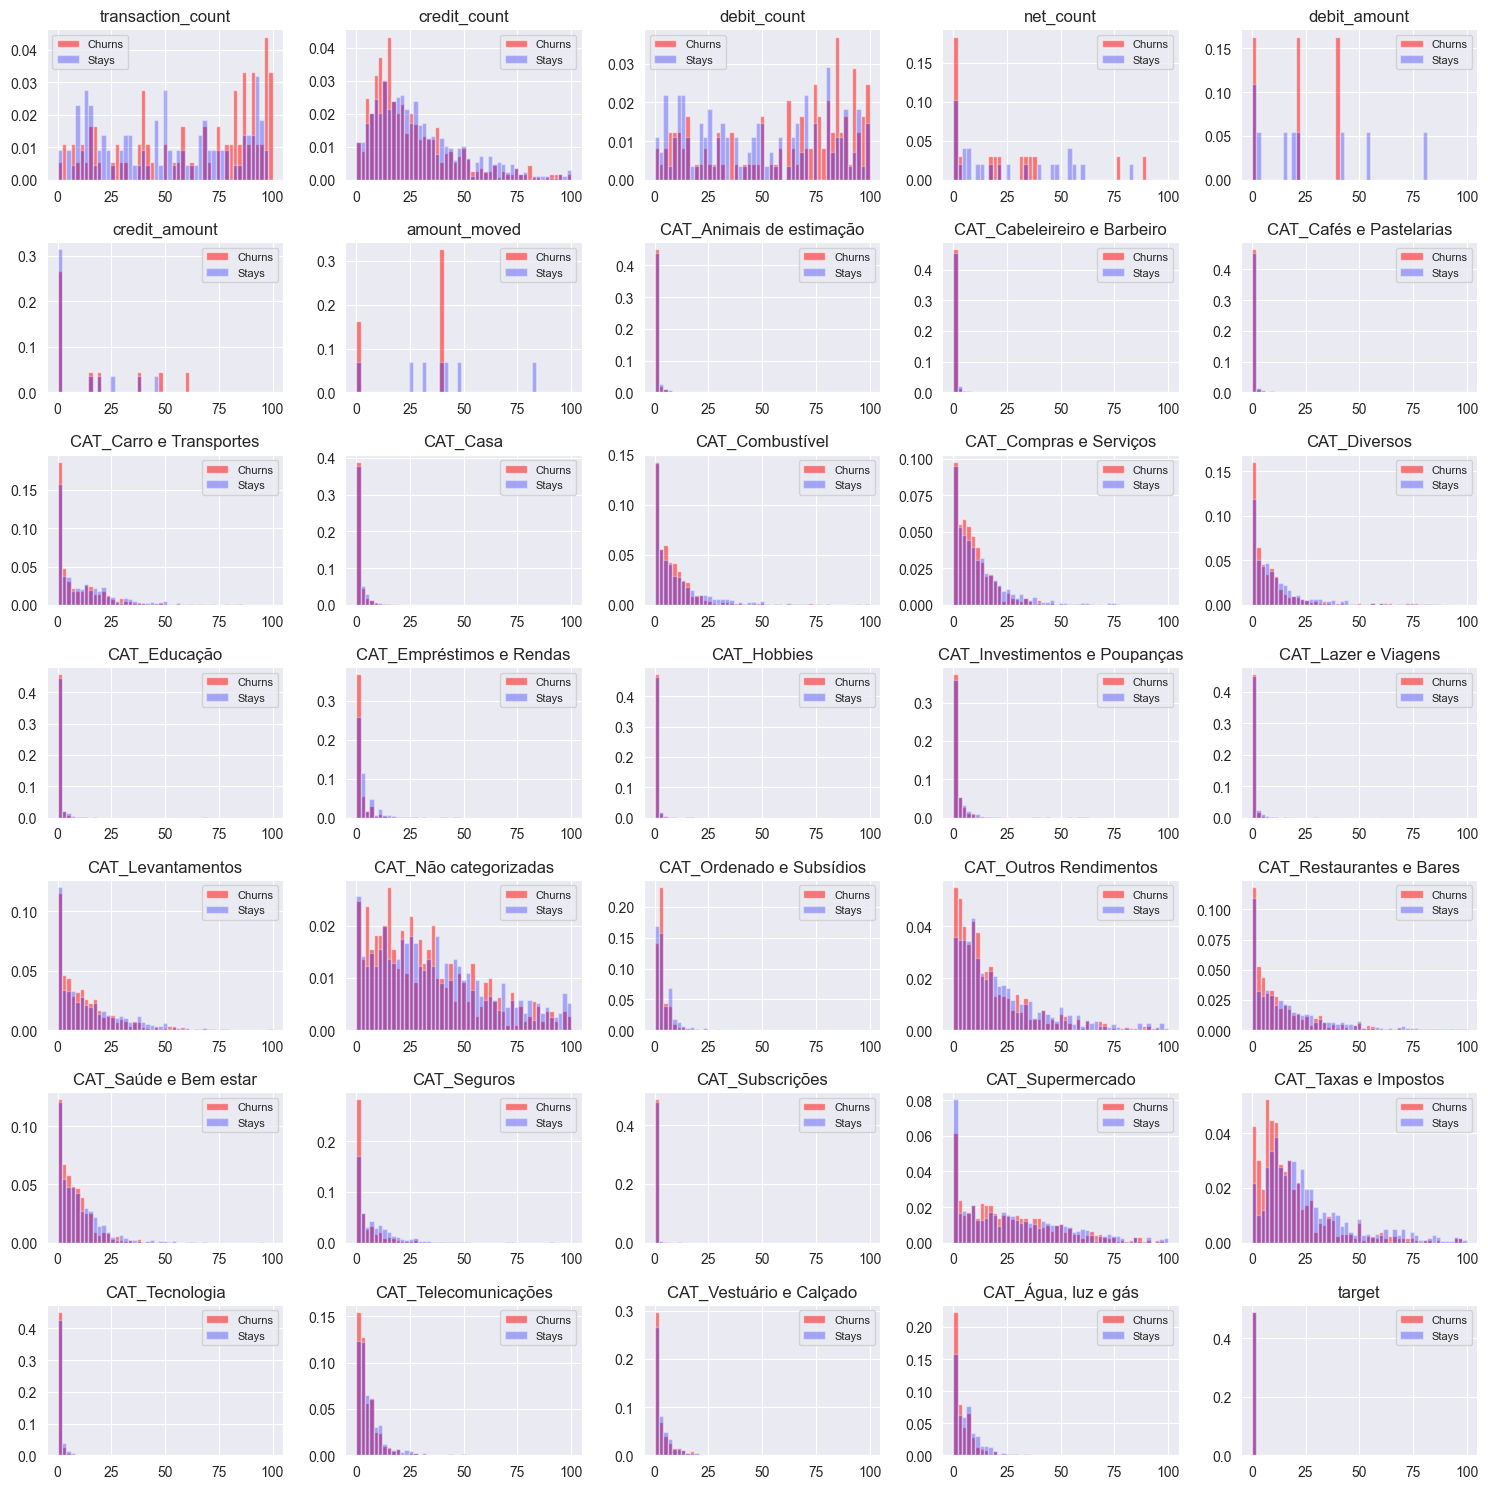

In [6]:
#df.loc[(df['transaction_count'] == 1) & (df['credit_amount'] > 1)]

_, axes = plt.subplots(7,5, figsize=(15, 15))

stays = compressed.loc[compressed['target'] == 0]
churn = compressed.loc[compressed['target'] == 1]

ax = axes.ravel()                     # flatten the 2D array
for i in range(compressed.shape[1]):  # for each of the 35 features
    bins = np.linspace(0, 100, 50)  # CHANGE THIS ACCORDING TO SPECIFICS!
    #---plot histogram for each feature---
    ax[i].hist(churn.iloc[:,i], bins=bins, color='r', alpha=.5 , density=True)
    ax[i].hist(stays.iloc[:,i], bins=bins, color='b', alpha=0.3, density=True)
    #---set the title---
    ax[i].set_title(compressed.columns[i], fontsize=12)    
    #---display the legend---
    ax[i].legend(['Churns','Stays'], loc='best', fontsize=8)

plt.tight_layout()
plt.show()

## Correlation Matrix

In [7]:
df    =compressed.drop(['target'], axis=1)
target=compressed.target

In [8]:
plt.figure(figsize=(14,14))
corr = compressed.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", annot_kws={"size": 5})

## PCA

We can reduce dimentionality to 29 variables!

In [9]:
scaler  = StandardScaler()
scale_x = scaler.fit_transform(df)

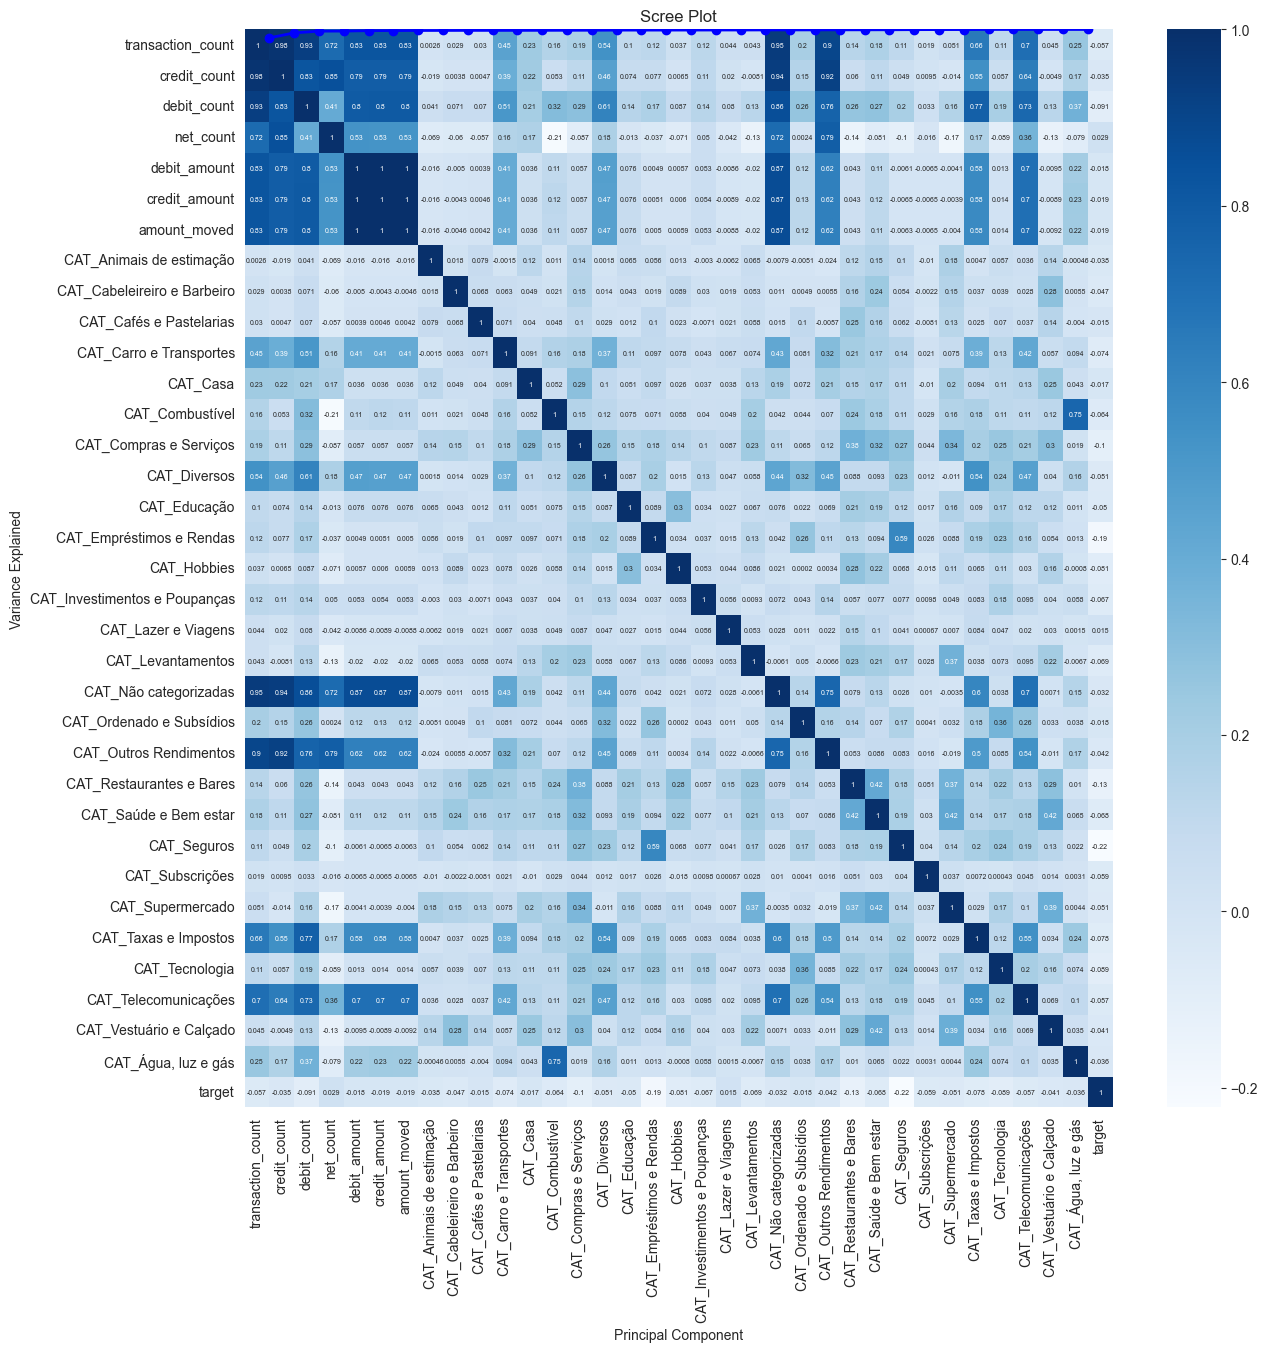

In [10]:
pca = PCA(n_components=df.shape[1])
principalComponents = pca.fit_transform(scale_x)

plt.plot(np.linspace(1, df.shape[1], df.shape[1]), pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [11]:
fig = plt.figure(figsize=(8, 6))

pca = PCA(n_components=2, svd_solver='auto')
principalComponents = pca.fit_transform(scale_x)

x, y = np.array(list(zip(*principalComponents)))

colormap = np.array(['turquoise', 'red'])

plt.scatter(x, y, s=5, c=colormap[target], alpha=0.5)

# Coordinates of rectangle vertices
# in clockwise order
xs = [1, 20, 20, 1, 1]
ys = [-13, -13, -7, -7, -13]
plt.plot(xs, ys, color="red")


plt.xscale('log')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

In [12]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.columns)
loading_matrix

,PC1,PC2
transaction_count,0.974630,0.081114
credit_count,0.924286,0.208207
debit_count,0.953336,-0.149065
net_count,0.611345,0.477419
debit_amount,0.892478,0.213506
credit_amount,0.893181,0.210907
amount_moved,0.892925,0.212247
CAT_Animais de estimação,0.016160,-0.250517
CAT_Cabeleireiro e Barbeiro,0.044003,-0.285791
CAT_Cafés e Pastelarias,0.048599,-0.267169


## Clustering 

In [13]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

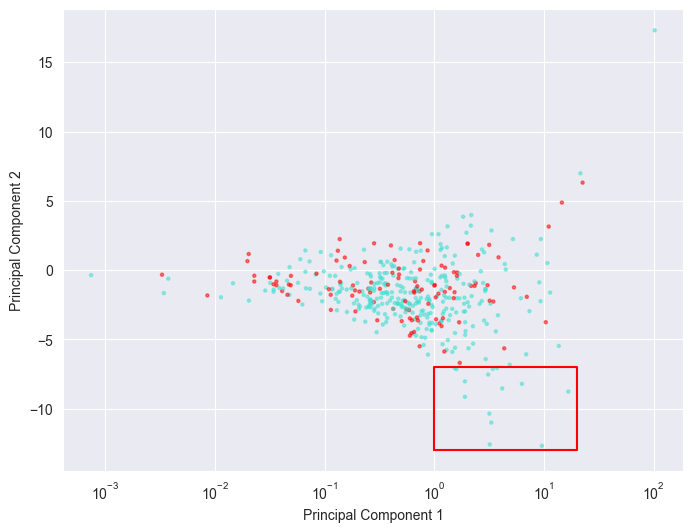

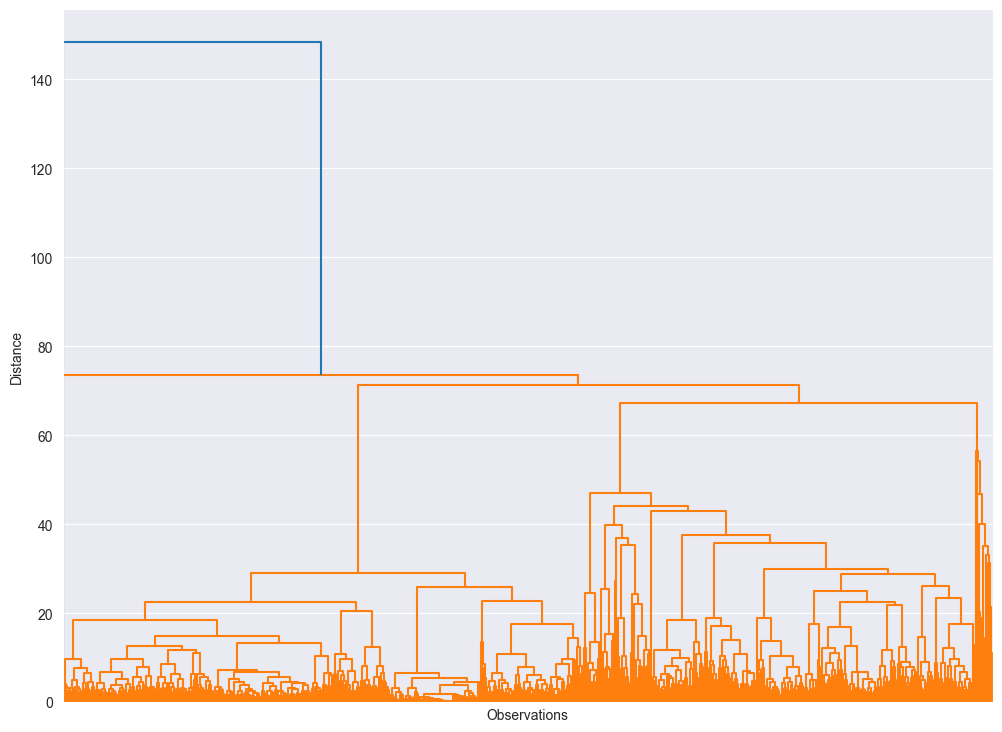

In [14]:
h_cluster = hierarchy.linkage(scale_x, 
                              method='ward',
                              metric='euclidean')


plt.figure(figsize=(12, 9))

hierarchy.dendrogram(h_cluster,
           show_leaf_counts=False,
           no_labels=True)

plt.xlabel('Observations')
plt.ylabel('Distance')
#plt.ylim(60, 160)
plt.show()

In [15]:
clustering_model = AgglomerativeClustering(n_clusters=4, 
                                           affinity='euclidean', 
                                           linkage='ward')
clustering_model.fit(scale_x)

compressed['cluster']=pd.Series(clustering_model.labels_)

In [16]:
# gt -> greater than, lt -> lesser than
g = compressed.groupby('cluster')['target']
counts = g.agg(
    churn =lambda s: s.sum(),
    stays =lambda s: s[s==0].count())

counts

,churn,stays
cluster,,
0,213,474
1,397,475
2,0,1
3,0,1


Let's check how clusters are distributed amonng most important features according to decision trees.

In [17]:
sns.scatterplot(x='credit_amount', 
                y='net_count', 
                data = compressed, 
                hue = 'target',
                alpha = 0.4, 
                edgecolor = 'darkgrey')

plt.xscale('log')